# Multi-photon Sampling
The following notebook demonstrates the use of the emulator to sample from multi-photon inputs.

First import required modules and some additional tools.

In [1]:
import matplotlib.pyplot as plt

import lightworks as lw
from lightworks import State, emulator

A general N is then defined, which is used to adjust the number of modes used for the interferometer throughout the notebook.

In [2]:
N = 8

Can then create a random unitary matrix which is programmed onto the chip.

In [3]:
U = lw.random_unitary(N, seed=10)

circuit = lw.Unitary(U)

For the simulation, the Sampler is used, choosing a 3 photon state with photons on mode 0, 1 and 2, and collecting 200 samples.

In [4]:
sampler = lw.Sampler(circuit, State([1, 1, 0] + [0] * (N - 3)), 200)

Once the sampler has been set up, we can then sample by running on a backend. This data is then converted into photon counts on each output mode.

In [5]:
backend = emulator.Backend("slos")
results = backend.run(sampler)

counts = dict.fromkeys(range(N), 0)

for state, count in results.items():
    # Get state from sampler and add photon counts to dict
    for j in range(N):
        counts[j] += state[j] * count

The counts can then be converted into probabilities and compared to the expected values calculated directly from the probability distribution.

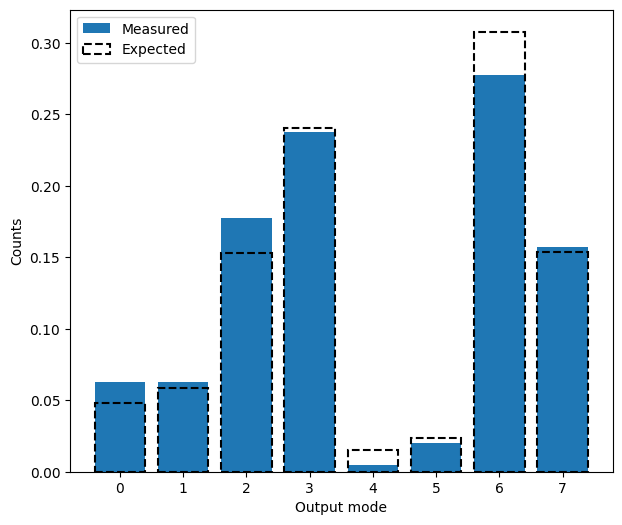

In [6]:
x = range(N)

# Convert counts to a list and normalise to total count numbers
p_calc = [counts[i] / sum(counts.values()) for i in x]

# Find expected distribution
counts_exp = {}  # Setup dict to store counts
for i in range(N):
    counts_exp[i] = 0
# Loop over each state and add photons to counts, weighted by probability
for state, p in sampler.probability_distribution.items():
    for j in range(N):
        counts_exp[j] += p * state[j]
# Normalise so sum is 1
p_exp = [counts_exp[i] / sum(counts_exp.values()) for i in x]

# Plotting
plt.figure(figsize=(7, 6))
plt.bar(x, p_calc, label="Measured", alpha=1)
plt.bar(
    x,
    p_exp,
    label="Expected",
    edgecolor="Black",
    fill=False,
    linestyle="dashed",
    linewidth=1.5,
)
plt.xlabel("Output mode")
plt.ylabel("Counts")
plt.legend()
plt.show()